# <B>Data Understanding

In [259]:
import pandas as pd
import datetime as dt
import warnings

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
#sns.color_palette("dark:salmon_r", as_cmap=True)

# Sets a filter to ignore warnings using the 'ignore' parameter.
warnings.filterwarnings('ignore') 

In [335]:
# Draw Bar Chart
def draw_bar_chart(df, x, y, title, column_name, y_name):
    import plotly.express as px

    # Set a dark color palette directly within Plotly Express
    fig = px.bar(df, x=x, y=y, color_discrete_sequence=["darkred"], text=y, title=title)

    # Update layout for better appearance
    fig.update_layout(
        xaxis_title=column_name.capitalize(),
        yaxis_title=y_name.capitalize(),
        font=dict(size=14, family="Arial"),
        title_font=dict(size=18, family="Arial", color="black"),
        title_x=0.5  # Center the title
    )

    # Show the plot
    fig.show()

In [ ]:
# Line chart
def DrawLineChart(df, x, y, title, xlabel, ylabel,  angle = 0):
    # Create a line plot trace
    trace = go.Scatter(
        x=df[x],
        y=df[y],
        mode='lines+markers',
        marker=dict(symbol='circle', size=8, color='lightcoral', line=dict(color='rgba(0,0,0,0)')),  # Use transparent line color
        line=dict(color='lightcoral', width=2),
        name='Line Plot'
    )
    # Create the layout
    layout = go.Layout(
        title=title,
        title_x=0.5,  # Title alignment to the center
        xaxis=dict(title=xlabel, tickfont=dict(size=10), showgrid=True, tickangle=angle),
        yaxis=dict(title=ylabel, tickfont=dict(size=13), showgrid=True),
        plot_bgcolor='white',
        showlegend=False,
        xaxis_showgrid=True,  # Show grid
        yaxis_showgrid=True,  # Show grid
    )
    # Create the figure
    fig = go.Figure(data=[trace], layout=layout)
    # Show the figure
    fig.show()

In [ ]:
# Plot Missing Values to Unmissing in Spacific Column
def plot_missing(df, column):
    missing_data = df[column].isnull().sum()
    total_data = len(df)
    percentage_missing = (missing_data / total_data) * 100
    
    # Plotly bar plot
    fig = go.Figure(data=[
        go.Bar(x=[f"Missing {column}", f"Present {column}"],
               y=[missing_data, total_data - missing_data],
               marker_color='lightcoral')
    ])
    
    fig.update_layout(title=f"Percentage of Missing Values in {column}: {percentage_missing:.2f}%",
                      xaxis_title=column,
                      yaxis_title="Number of Values",
                      bargap=0.2)
    fig.show()

In [ ]:
#Histogram
def DrawHistogram(df, x, bins, xlabel, ylabel, title):
    # Plotting the histogram
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df[x], nbinsx=bins, marker_color='lightcoral'))
    # Update layout
    fig.update_layout(
        title=title,
        title_x=0.5,  # Title alignment to the center
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        xaxis=dict(tickfont=dict(size=12)),
        yaxis=dict(tickfont=dict(size=12)),
        bargap=0.05,
        plot_bgcolor='white',
        showlegend=False
    )
    fig.show()

In [ ]:
# Draw Pie Chart
def draw_pie_chart_go(labels, values, title):
    colorscale = 'dark'
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=title)
    fig.show()

In [260]:
df = pd.read_excel("online_retail_II.xlsx")
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [262]:
df.shape

(525461, 8)

In [263]:
df.describe().transpose()

count          mean          std       min       25%      50%  \
Quantity     525461.0     10.337667   107.424110  -9600.00      1.00      3.0   
Price        525461.0      4.688834   146.126914 -53594.36      1.25      2.1   
Customer ID  417534.0  15360.645478  1680.811316  12346.00  13983.00  15311.0   

                  75%       max  
Quantity        10.00  19152.00  
Price            4.21  25111.09  
Customer ID  16799.00  18287.00

In [264]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [265]:
l.plot_missing(df, "Description")


In [266]:
plot_missing(df, "Customer ID")

# <b>Data Preparation

In [267]:
df.drop_duplicates(inplace=True)

In [268]:
df.dropna(inplace=True)

In [269]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [270]:
df['Customer ID'] = df['Customer ID'].astype(int)

## Most 10 Products on Sales

In [317]:
df.Description = df.Description.str.title()

In [318]:
# Number of Uniqe Products
print("Number of Uniqe Products",df.Description.nunique())

Number of Uniqe Products 4444


In [319]:
df.Description.value_counts()[:10]

White Hanging Heart T-Light Holder    3107
Regency Cakestand 3 Tier              1695
Strawberry Ceramic Trinket Box        1372
Assorted Colour Bird Ornament         1355
Home Building Block Word              1192
Pack Of 72 Retro Spot Cake Cases      1183
60 Teatime Fairy Cake Cases           1169
Rex Cash+Carry Jumbo Shopper          1099
Jumbo Bag Red Retrospot               1075
Lunch Bag Red Spotty                  1069
Name: Description, dtype: int64

In [336]:
draw_bar_chart(df,
               x=df.Description.value_counts()[:10].index,
               y=df.Description.value_counts()[:10].values,
               title="Top 10 Products in Sales",
            
               column_name="Description",
               y_name="Number of Orders")


### Countries with Numbers Of Orders 

In [274]:
print('Number of Contries', df.Country.nunique())

Number of Contries 37


In [275]:
df.Country.value_counts()

United Kingdom          372705
EIRE                      8705
Germany                   8120
France                    5692
Netherlands               2768
Spain                     1271
Switzerland               1187
Belgium                   1053
Portugal                  1023
Channel Islands            906
Sweden                     882
Italy                      729
Australia                  654
Cyprus                     546
Austria                    537
Greece                     517
Denmark                    428
Norway                     369
Finland                    354
United Arab Emirates       318
Unspecified                280
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65
Korea   

In [276]:
#Only to 10
df.Country.value_counts()[:10]

United Kingdom     372705
EIRE                 8705
Germany              8120
France               5692
Netherlands          2768
Spain                1271
Switzerland          1187
Belgium              1053
Portugal             1023
Channel Islands       906
Name: Country, dtype: int64

In [330]:
draw_bar_chart(df,
               x = df.Country.value_counts()[:10].index,
               y=df.Country.value_counts()[:10].values,
               title="Top 10 Countries On Sales",            
               column_name="Country",
               y_name="Number of Orders"
               )


### Total Number of Units were purchased 

In [278]:
df.groupby('Description').agg({"Quantity" : "sum"}).sort_values("Quantity", ascending = False)

Quantity
Description                                  
WHITE HANGING HEART T-LIGHT HOLDER      55760
WORLD WAR 2 GLIDERS ASSTD DESIGNS       54130
BROCADE RING PURSE                      47430
PACK OF 72 RETRO SPOT CAKE CASES        44480
ASSORTED COLOUR BIRD ORNAMENT           44000
...                                       ...
TREE OF NOAH FESTIVE SCENTED CANDLE       -46
LARGE RED RETROSPOT WINDMILL              -64
SILVER CHERRY LIGHTS                      -93
WHITE CHERRY LIGHTS                       -97
Discount                                -1675

[4459 rows x 1 columns]

### Total Invoices have been purchased

In [279]:
df['Invoice'].nunique()

23587

### Total Costs for each Invoice 

In [280]:
df['TotalPrice'] = df['Quantity'] * df['Price']
df['TotalPrice'].head()

0     83.4
1     81.0
2     81.0
3    100.8
4     30.0
Name: TotalPrice, dtype: float64

### Invoices with Total Price

In [281]:

df.groupby('Invoice').agg({'TotalPrice' :"sum"}).sort_values("TotalPrice", ascending = False).head()

TotalPrice
Invoice            
493819     44051.60
524181     33167.80
526934     26007.08
515944     22863.36
517731     21984.00

### Invoices with Price 0

In [282]:
df_0Price = df[df.Price == 0]

df_0Price.shape
# PriceOf0 = df.groupby('Invoice').agg({'TotalPrice': 'sum'}).sort_values("TotalPrice", ascending=False)
# num_zero_prices = len(PriceOf0[PriceOf0['TotalPrice'] == 0])
# num_zero_prices

(31, 9)

In [283]:
df_0Price.head()

Invoice StockCode                     Description  Quantity  \
4674   489825     22076              6 RIBBONS EMPIRE          12   
6781   489998     48185             DOOR MAT FAIRY CAKE         2   
16107  490727         M                          Manual         1   
18738  490961     22065  CHRISTMAS PUDDING TRINKET POT          1   
18739  490961     22142    CHRISTMAS CRAFT WHITE FAIRY         12   

              InvoiceDate  Price  Customer ID         Country  TotalPrice  
4674  2009-12-02 13:34:00    0.0        16126  United Kingdom         0.0  
6781  2009-12-03 11:19:00    0.0        15658  United Kingdom         0.0  
16107 2009-12-07 16:38:00    0.0        17231  United Kingdom         0.0  
18738 2009-12-08 15:25:00    0.0        14108  United Kingdom         0.0  
18739 2009-12-08 15:25:00    0.0        14108  United Kingdom         0.0

In [284]:
## Drop Invoces with Price 0
df.drop(df[df['Price'] == 0.0].index, inplace=True)

In [285]:
df.shape

(410732, 9)

### Cancelled Invoices

In [286]:
df = df[~df['Invoice'].astype(str).str.contains('C', na=False)]

In [287]:
# removing the cancelled Invoices
#df = df[~df["Invoice"].str.contains("C", na = False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400916 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  int32         
 7   Country      400916 non-null  object        
 8   TotalPrice   400916 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 29.1+ MB


### Invoice Date

In [288]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [289]:
df['Date'] = df.InvoiceDate.dt.strftime('%m/%d/%Y')
df['Month'] = df.InvoiceDate.dt.strftime('%B')
df['Week'] = df.InvoiceDate.dt.strftime('%A') 
df['Time'] = df.InvoiceDate.dt.strftime('%H') 
df['Month_Number'] = df['InvoiceDate'].dt.strftime('%m')

In [290]:
df.head(2)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  \
0 2009-12-01 07:45:00   6.95        13085  United Kingdom        83.4   
1 2009-12-01 07:45:00   6.75        13085  United Kingdom        81.0   

         Date     Month     Week Time Month_Number  
0  12/01/2009  December  Tuesday   07           12  
1  12/01/2009  December  Tuesday   07           12

### Total Sales by Month

In [291]:
df['Month_Number'] = df['Month_Number'].astype(int)

In [292]:
# Define the order of months
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Convert 'month_name' column to categorical with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by 'month_name' based on the specified order
df_sorted = df.sort_values(by='Month')

# Group by 'month_name' and aggregate sum of 'totalPrice'
result = df_sorted.groupby('Month').agg({'TotalPrice': 'sum'}).reset_index()


In [293]:
result

Month   TotalPrice
0     January   555802.672
1    February   504558.956
2       March   696978.471
3       April   591982.002
4         May   597833.380
5        June   636371.130
6        July   589736.170
7      August   602224.600
8   September   829013.951
9     October  1033112.010
10   November  1166460.022
11   December   994160.380

In [294]:
DrawLineChart(result, 'Month', 'TotalPrice', title= 'Total Sales by Month',
              xlabel = 'Month of Year', ylabel = 'Total Price', angle = 45)


### Days of Week Total Sales

In [295]:
# Define the order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'Week' column to categorical with the specified order
df['Week'] = pd.Categorical(df['Week'], categories=weekday_order, ordered=True)

# Group by 'Week' and aggregate sum of 'TotalPrice'
result_weekdays = df.groupby('Week').agg({'TotalPrice': 'sum'}).reset_index()
result_weekdays

Week   TotalPrice
0     Monday  1445606.495
1    Tuesday  1678827.301
2  Wednesday  1522046.713
3   Thursday  1858159.182
4     Friday  1269250.992
5   Saturday     9803.050
6     Sunday  1014540.011

In [296]:
DrawLineChart(result_weekdays, 'Week', 'TotalPrice', title= 'Total Sales by Days',
              xlabel = 'Day of Week', ylabel = 'Total Price')


### Orders per Hours

In [297]:
df.Time.unique()

array(['07', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '08', '20'], dtype=object)

In [298]:
DrawHistogram(df, 'Time', 24, xlabel = 'Hours throught the Day', 
              ylabel = 'Number of Orders', 
              title = 'Number of Orders Per Hours')

# RFM

In [299]:
df['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [300]:
today_date = dt.datetime(2010, 12, 10)
today_date

datetime.datetime(2010, 12, 10, 0, 0)

In [301]:
## For each customer: Number od Days since last operation, Number of invoices, total Price
df_RFM = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days,
    'Invoice': lambda num : num.nunique(),
    'TotalPrice': lambda price : price.sum()
}) 
df_RFM.head() 

InvoiceDate  Invoice  TotalPrice
Customer ID                                  
12346                164       11      372.86
12347                  2        2     1323.32
12348                 73        1      222.16
12349                 42        3     2671.14
12351                 10        1      300.93

In [302]:
# Rename Column to RFM
df_RFM.columns = ['Recency', 'Frequency', 'Montary']
df_RFM.head()

Recency  Frequency  Montary
Customer ID                             
12346            164         11   372.86
12347              2          2  1323.32
12348             73          1   222.16
12349             42          3  2671.14
12351             10          1   300.93

In [303]:
# Calculate recency score based on quantiles, assigning labels from 1 to 5 (1 being lowest recency)
df_RFM["Recency_Score"] = pd.qcut(df_RFM['Recency'], 5, labels=[5, 4, 3, 2, 1])
    
# Calculate frequency score based on rank quantiles, assigning labels from 1 to 5 (1 being lowest frequency)
df_RFM["Frequency_Score"] = pd.qcut(df_RFM["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

df_RFM.head()

Recency  Frequency  Montary Recency_Score Frequency_Score
Customer ID                                                           
12346            164         11   372.86             2               5
12347              2          2  1323.32             5               2
12348             73          1   222.16             2               1
12349             42          3  2671.14             3               3
12351             10          1   300.93             5               1

In [304]:
# Combine recency and frequency scores to create RFM segment
df_RFM['Segment'] = df_RFM['Recency_Score'].astype(str) + df_RFM['Frequency_Score'].astype(str)
df_RFM.head()

Recency  Frequency  Montary Recency_Score Frequency_Score Segment
Customer ID                                                                   
12346            164         11   372.86             2               5      25
12347              2          2  1323.32             5               2      52
12348             73          1   222.16             2               1      21
12349             42          3  2671.14             3               3      33
12351             10          1   300.93             5               1      51

In [305]:
# Mapping of segments to their corresponding customer segments
seg_map = {
r'[1-2][1-2]': 'Hibernating',
r'[1-2][3-4]': 'At Risk',
r'[1-2]5': 'Can\'t Loose',
r'3[1-2]': 'About To Sleep',
r'33': 'Need Attention',
r'[3-4][4-5]': 'Loyal Customers',
r'41': 'Promising',
r'51': 'New Customers',
r'[4-5][2-3]': 'Potential Loyalists',
r'5[4-5]': 'Champions'
    }

# Map RFM segments to corresponding customer segments using predefined seg_map
df_RFM['Segment'] = df_RFM['Segment'].replace(seg_map, regex=True)

# Keep only relevant columns and return the resulting dataframe
df_RFM = df_RFM[["Recency", "Frequency", "Montary", "Segment"]]

df_RFM.index = df_RFM.index.astype(int)  # Convert index to integer
df_RFM.head()

Recency  Frequency  Montary              Segment
Customer ID                                                  
12346            164         11   372.86          Can't Loose
12347              2          2  1323.32  Potential Loyalists
12348             73          1   222.16          Hibernating
12349             42          3  2671.14       Need Attention
12351             10          1   300.93        New Customers

### Customer Segmentation

In [306]:
Segments = df_RFM.Segment.value_counts()
Segments

Hibernating            1015
Loyal Customers         742
Champions               663
At Risk                 611
Potential Loyalists     517
About To Sleep          343
Need Attention          207
Promising                87
Can't Loose              77
New Customers            50
Name: Segment, dtype: int64

In [331]:
draw_bar_chart(Segments, Segments.index, y = Segments.values, title = 'FRM Segments',
               column_name = 'Segments', y_name = 'Number of Customers')

In [308]:
df_RFM.head()

Recency  Frequency  Montary              Segment
Customer ID                                                  
12346            164         11   372.86          Can't Loose
12347              2          2  1323.32  Potential Loyalists
12348             73          1   222.16          Hibernating
12349             42          3  2671.14       Need Attention
12351             10          1   300.93        New Customers

In [337]:
Segments

Hibernating            1015
Loyal Customers         742
Champions               663
At Risk                 611
Potential Loyalists     517
About To Sleep          343
Need Attention          207
Promising                87
Can't Loose              77
New Customers            50
Name: Segment, dtype: int64

In [344]:
def DrawPieChart(color, labels):
    plt.figure(figsize = (10, 8), )
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

    Segments.plot(kind = 'pie',
                color=color,
                explode = explode,
                autopct = '%1.2f%%')
    plt.axis('equal')
    plt.legend(labels = labels, loc = "best")
    plt.show()
DrawPieChart(Segments.index, Segments.values)    

In [349]:

draw_pie_chart_go(Segments.index, Segments.values, 'Number of Customers in Each Segment')

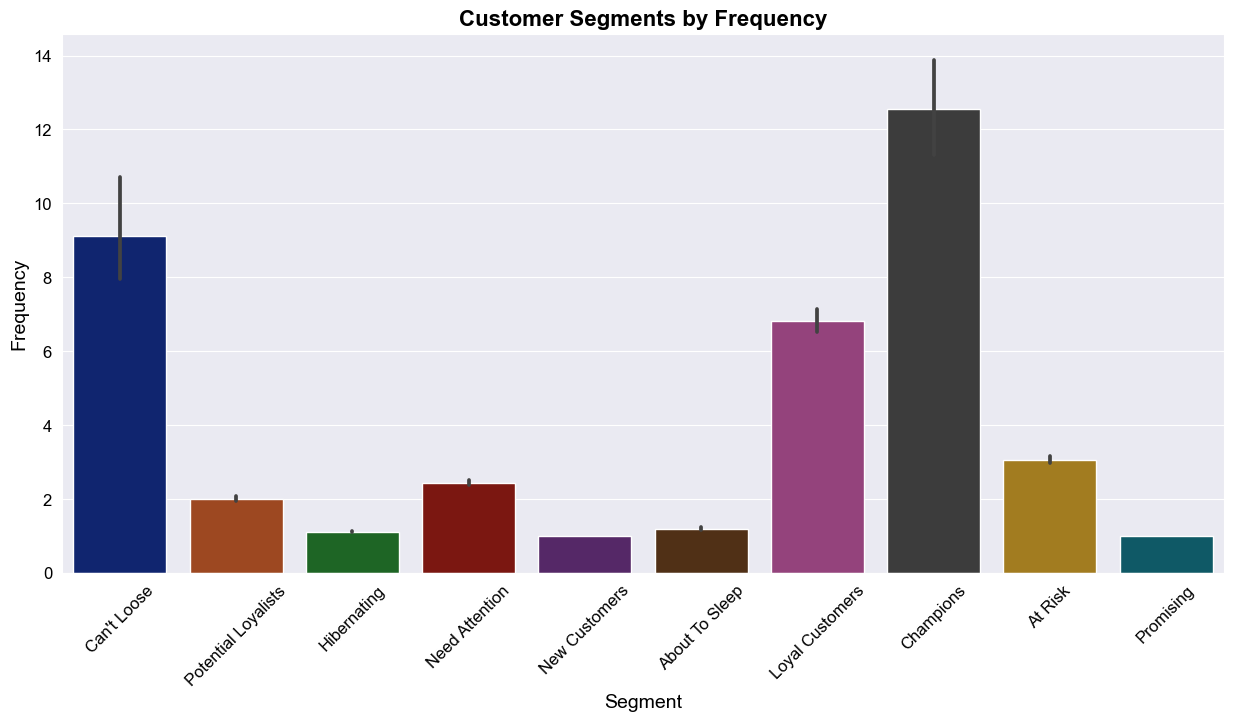

In [332]:
# Set style
sns.set_style("darkgrid")

# Set color palette
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x="Segment", y="Frequency", data=df_RFM, palette=colors)
plt.title("Customer Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

this code uses the "Frequency" column from your RFM data to create a bar chart that visualizes the distribution of customer segments based on their purchase frequency. The chart helps you understand how many customers fall into each segment based on how often they make purchases.

In [316]:
df_RFM[["Segment","Recency", "Frequency", "Montary"]].groupby("Segment").agg(["mean", "count","sum"])

Recency                Frequency              \
                           mean count     sum       mean count   sum   
Segment                                                                
About To Sleep        52.819242   343   18117   1.201166   343   412   
At Risk              151.158756   611   92358   3.073650   611  1878   
Can't Loose          123.116883    77    9480   9.116883    77   702   
Champions              6.119155   663    4057  12.553544   663  8323   
Hibernating          212.885714  1015  216079   1.126108  1015  1143   
Loyal Customers       35.287062   742   26183   6.830189   742  5068   
Need Attention        52.265700   207   10819   2.449275   207   507   
New Customers          7.580000    50     379   1.000000    50    50   
Potential Loyalists   17.793037   517    9199   2.017408   517  1043   
Promising             24.747126    87    2153   1.000000    87    87   

                         Montary                     
                            mean count          sum  
Segment                                              
About To Sleep        439.841370   343   150865.590  
At Risk              1182.610738   611   722575.161  
Can't Loose          4079.670519    77   314134.630  
Champions            6833.988738   663  4530934.533  
Hibernating           402.466378  1015   408503.374  
Loyal Customers      2732.385264   742  2027429.866  
Need Attention       1054.701787   207   218323.270  
New Customers         383.674800    50    19183.740  
Potential Loyalists   724.825629   517   374734.850  
Promising             362.629080    87    31548.730

### <b>Customer Segmentation Analysis and Recommendations</b>



### About to Sleep
- **Mean Recency:** 53.819 days (343 customers)
- **Mean Frequency:** 1.201 (412 purchases)
- **Mean Monetary Value:** $441.320 (Total: $151,372.760)

**Recommendations:**
- Offer loyalty rewards or VIP programs to further incentivize their frequent purchases.
- Provide exclusive offers or early access to new products/services to maintain their engagement.

### At Risk
- **Mean Recency:** 152.159 days (611 customers)
- **Mean Frequency:** 3.074 (1878 purchases)
- **Mean Monetary Value:** $1188.878 (Total: $726,404.651)

**Recommendations:**
- Implement targeted re-engagement campaigns to remind them of your value proposition.
- Offer personalized discounts or promotions to encourage repeat purchases.

### New Customers
- **Mean Recency:** 8.580 days (50 customers)
- **Mean Frequency:** 1.000 (50 purchases)
- **Mean Monetary Value:** $386.199 (Total: $19,309.960)

**Recommendations:**
- Welcome them with a special discount or promotion for their next purchase to encourage repeat business.
- Implement an onboarding email series to introduce them to your products/services.

### Potential Loyalists
- **Mean Recency:** 18.793 days (517 customers)
- **Mean Frequency:** 2.017 (1043 purchases)
- **Mean Monetary Value:** $729.511 (Total: $377,157.180)

**Recommendations:**
- Offer incentives for increasing their frequency of purchases, such as referral bonuses or points-based rewards.
- Provide personalized product recommendations based on their past purchases to enhance their shopping experience.

### Hibernating
- **Mean Recency:** 213.886 days (1015 customers)
- **Mean Frequency:** 1.126 (1143 purchases)
- **Mean Monetary Value:** $403.978 (Total: $410,037.504)

**Recommendations:**
- Reach out with personalized win-back offers or discounts to encourage them to return.
- Conduct surveys or feedback sessions to understand why they stopped purchasing and address any concerns.

These recommendations are tailored to each segment's behavior and value, aiming to optimize marketing strategies and improve customer retention and satisfaction.
